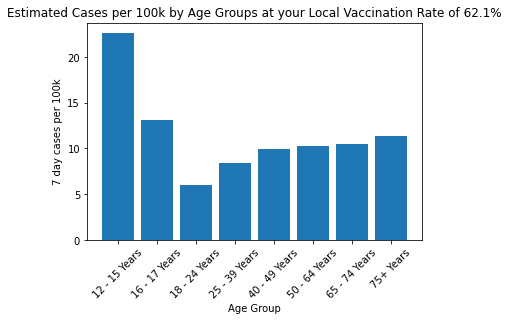

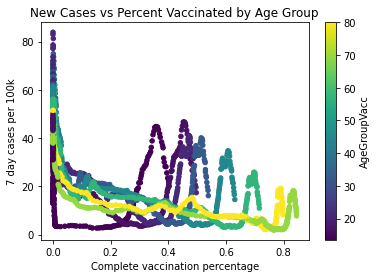

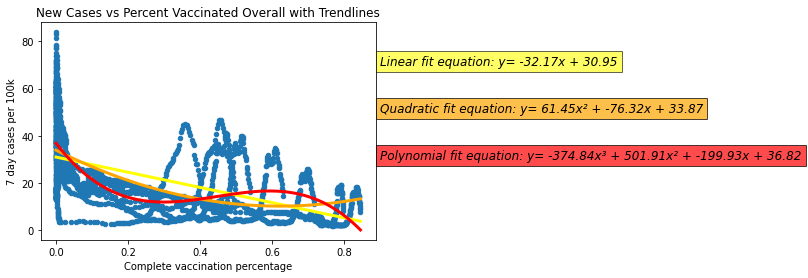

YOUR PERSONAL RISK
Your daily personal risk of contracting covid based on your age (27) and local vaccination rate of 62.1%:
9.08 per 100k

IMPACT OF VACCINATION
Your daily personal covid risk with a 0% vaccination rate in your community would be:
30.80 per 100k. That is 3.4 times higher than it would be at the current vaccination rate.

COVID-19 ERADICATION
Estimated overall vaccination rate needed for covid eradication:
84.6% Vaccination

STATISTICAL INFORMATION
The multiple variable model used to derive your personal risk was able to predict 30.7% of the variance in Covid-19 rates when looking at age and vaccination rates (Based on calculated R^2 score).

The estimated vaccination rate needed to end the outbreak was derived from the red Complex Polynomial equation shown above by extrapolating to the X intercept at 0 cases per 100k overall.
This model was able to predict 41.8% of the variance observed in Covid-19 rates, and was the best fit of the three linear and non-linear models u

In [9]:
###Load libraries
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import os
import numpy


####LOAD AND FILTER DATASET####

#load file from computer
url = os.path.abspath("COVID-19_Vaccination_and_Case_Trends_by_Age_Group__United_States.csv")

#add column names
names = ['Date_Administered','AgeGroupVacc','7-day_avg_group_cases_per_100k','Administered_Dose1_pct_agegroup','Series_Complete_Pop_pct_agegroup']

#Read File From disc and exclude rows
datasetCases = read_csv(url,names=names, usecols=[1, 2, 4], skiprows=[0,0])

#Replace blank values with 0.0. These blank values were from the beggining of the outbreak, where there were little to no confirmed cases.
datasetCases = datasetCases.replace(numpy.nan,0.0)

#filter out <12 Years
datasetCases = datasetCases.loc[datasetCases['AgeGroupVacc'] != '<12 Years'] 


####USER VARIABLES####

#initiate user input variables
userAge = -1
masterPerc = -1

#ensure user input variables are numbers within correct ranges
while userAge <12 or userAge >95:
    try: 
        userAge = int(input("Enter your age (12-95)"))
    except:
        print("Please only enter numbers into prompt")


while masterPerc <0 or masterPerc >1:
    try:
         masterPerc = float(input("Enter your local vaccination rate (0-100)"))/100
    except:
        print("Please only enter numbers into prompt")


####AGES FROM GROUPS####

#generate dictionary of ages to change displayed ages into their average numbers
ageDictionary = {
    '12 - 15 Years':13.5,
    '16 - 17 Years':16.5,
    '18 - 24 Years':21.0,
    '25 - 39 Years':32.0,
    '40 - 49 Years':44.5,
    '50 - 64 Years':57.0,
    '65 - 74 Years':69.5,
    '75+ Years':80.0
}
ageGroups = ['12 - 15 Years', '16 - 17 Years', '18 - 24 Years', '25 - 39 Years', '40 - 49 Years', '50 - 64 Years', '65 - 74 Years', '75+ Years']
inputValues = [13.5, 16.5, 21.0, 32.0, 44.5, 57.0, 69.5, 80.0]

#changing the data inside the dataset of case rates into numbers using the age group dictionary
for key in ageDictionary:
    datasetCases.loc[datasetCases['AgeGroupVacc'] == key, 'AgeGroupVacc']=ageDictionary[key]


####GROUP INTO AGES####

#Create GroupBy object of age groups and create list of index names
seperateCases = datasetCases.groupby('AgeGroupVacc')

#Create index of age group names  #print(seperateCasesIndex)
seperateCasesIndex = []
for key, value in seperateCases.indices.items() :
    seperateCasesIndex.append(key)

#scatterplot matrix using age and user input for vaccination
ageGroupCases = [] #the collection of Y values corresponding to the X labels of the bar chart
for title, group in seperateCases:
    X = group[['Series_Complete_Pop_pct_agegroup']]
    y = group['7-day_avg_group_cases_per_100k']

    model = linear_model.LinearRegression()
    model.fit(X, y)

    #Use user input of vaccination for all values
    predictedCases = model.predict([[masterPerc]])

    #exclude results that fall below 0 risk, as that is not physically possible
    if predictedCases[0] > 0:
        ageGroupCases.append(predictedCases[0])
    else:
        ageGroupCases.append(0.0)


####TRAIN MULTILINEAR REGRESSION####

#take X and y columns
X = datasetCases[['Series_Complete_Pop_pct_agegroup', 'AgeGroupVacc']]
y = datasetCases['7-day_avg_group_cases_per_100k']

#Generate multilinear regression model
model = linear_model.LinearRegression()
model.fit(X, y)


####CREATE CHARTS####

#bar for ages#
pyplot.bar(ageGroups, ageGroupCases, bottom=0)
pyplot.title('Estimated Cases per 100k by Age Groups at your Local Vaccination Rate of ' + str(masterPerc*100) + '%')
pyplot.xlabel('Age Group')
pyplot.ylabel('7 day cases per 100k')
pyplot.xticks(rotation = 45)
pyplot.show()

#scatterplot broken down
fig, ax = pyplot.subplots()
datasetCases.plot(kind='scatter', x='Series_Complete_Pop_pct_agegroup', y='7-day_avg_group_cases_per_100k', c="AgeGroupVacc", title='New Cases vs Percent Vaccinated by Age Group', cmap="viridis" ,ylabel='7 day cases per 100k', xlabel='Complete vaccination percentage', ax=ax)

#scatterplot for trendline
datasetCases.plot.scatter(x='Series_Complete_Pop_pct_agegroup', y='7-day_avg_group_cases_per_100k', title='New Cases vs Percent Vaccinated Overall with Trendlines', ylabel='7 day cases per 100k', xlabel='Complete vaccination percentage')
modelToFit = datasetCases['Series_Complete_Pop_pct_agegroup']


####TRAIN NONLINEAR REGRESSION####

#generate models
linearFit = numpy.polyfit(modelToFit, y, 1)
quadFit = numpy.polyfit(modelToFit, y, 2)
cubicFit = numpy.polyfit(modelToFit, y, 3)

linearFited = numpy.poly1d(linearFit)
quadFited = numpy.poly1d(quadFit)
cubicFited = numpy.poly1d(cubicFit)


####DRAW EQUATIONS#### 

#sort model for viewing
modelToFit = numpy.sort(datasetCases['Series_Complete_Pop_pct_agegroup'])

#graph equations
pyplot.plot(modelToFit, linearFited(modelToFit), "yellow", linewidth=3)
pyplot.plot(modelToFit, quadFited(modelToFit), "orange", linewidth=3)
pyplot.plot(modelToFit, cubicFited(modelToFit), "red", linewidth=3)

#display equations
linearEquationWritten = ("y= %.2fx + %.2f"%(linearFit[0],linearFit[1]))
pyplot.text(0.90,70,"Linear fit equation: " + linearEquationWritten, bbox=dict(facecolor='yellow', alpha=0.6), size="large", style="oblique")

quadEquationWritten = ("y= %.2fx² + %.2fx + %.2f"%(quadFit[0],quadFit[1],quadFit[2]))
pyplot.text(0.90,50,"Quadratic fit equation: " + quadEquationWritten, bbox=dict(facecolor='orange', alpha=0.7), size="large", style="oblique")

cubedEquationWritten = ("y= %.2fx³ + %.2fx² + %.2fx + %.2f"%(cubicFit[0],cubicFit[1],cubicFit[2],cubicFit[3]))
pyplot.text(0.90,30,"Polynomial fit equation: " + cubedEquationWritten, bbox=dict(facecolor='red', alpha=0.7), size="large", style="oblique")

#finalize
pyplot.show()


####MATH FOR NONLINEAR REGRESSION MODELS####

#fill lists with real Y valyes
newYFormat = datasetCases['7-day_avg_group_cases_per_100k']
newXFormat = datasetCases['Series_Complete_Pop_pct_agegroup']

#generate lists of predicted Y values corresponding to X values to check accuracy
linearXList = linearFited(newXFormat)
quadXList = quadFited(newXFormat)
cubicXList = cubicFited(newXFormat)

#create results objects in format: [name, S, R, xIntercept]
linearResults = ['yelow Linear',0.0,0.0,0.0]
quadResults = ['orange Quadratic',0.0,0.0,0.0]
cubicResults = ['red Complex Polynomial',0.0,0.0,0.0]

# find the S value, standard error of regression for 3 models by comparing against list of real Y values
linearResults[1] = numpy.sqrt(mean_squared_error(newYFormat,linearXList))
quadResults[1] = numpy.sqrt(mean_squared_error(newYFormat,quadXList))
cubicResults[1] = numpy.sqrt(mean_squared_error(newYFormat,cubicXList))

# R^2 values
linearResults[2] = r2_score(newYFormat,linearXList)
quadResults[2] = r2_score(newYFormat,quadXList)
cubicResults[2] = r2_score(newYFormat,cubicXList)

#find x intercept for each model
linearResults[3] = linearFited.r.real[0]
quadResults[3] = quadFited.r.real[0]
cubicResults[3] = cubicFited.r.real[0]

#Compare y values for best fit using Standard Error of Regression value
bestResults = linearResults
if quadResults[1] < bestResults[1]:
    bestResults = quadResults
if cubicResults[1] < bestResults[1]:
    bestResults = cubicResults

#percent vaccination and age, user outputs using MultiLinear model
predictedCases = model.predict([[masterPerc, userAge]])
predictedCasesZero = model.predict([[0, userAge]])

#find R2 value of multilinear regression model against data
multiResult = model.score(X,y)

#remove possibility of displaying negative risk values
if predictedCases[0] <0.0:
    predictedCases[0] = 0.0


####PRINT RESULTS####
print("YOUR PERSONAL RISK")
print("Your daily personal risk of contracting covid based on your age (" + str(userAge) + ") and local vaccination rate of " + str(masterPerc*100) + "%:")
print("%.2f" %predictedCases[0] + " per 100k" )
print()

print("IMPACT OF VACCINATION")
print("Your daily personal covid risk with a 0% vaccination rate in your community would be:")
if predictedCases[0]>0.0: #avoid divide by 0 error
    print("%.2f" %predictedCasesZero[0] + " per 100k. That is " + "%.1f" %(predictedCasesZero[0]/predictedCases[0]) + " times higher than it would be at the current vaccination rate." )
else:
    print("%.2f" %predictedCasesZero[0] + " per 100k.")    
print()

print("COVID-19 ERADICATION")
print("Estimated overall vaccination rate needed for covid eradication:")
print("%.1f" % (bestResults[3]*100) +  "% Vaccination")
print()

print("STATISTICAL INFORMATION")
print("The multiple variable model used to derive your personal risk was able to predict " + "%.1f" % (multiResult*100) +  "% of the variance in Covid-19 rates when looking at age and vaccination rates (Based on calculated R^2 score).")
print()

print("The estimated vaccination rate needed to end the outbreak was derived from the " + bestResults[0] + " equation shown above by extrapolating to the X intercept at 0 cases per 100k overall.")
print("This model was able to predict " + "%.1f" % (bestResults[2]*100) + "% of the variance observed in Covid-19 rates, and was the best fit of the three linear and non-linear models used.")
print()

print("Covid-19 rates are expected to vary by around " + "%.1f" % (bestResults[1]) +  " per 100k people compared to the predicted numbers, based on the statistical variance of our data for the best fit method (based on S or Standard Error of Regression)." )
